### Definition of function that implements k-Means with numpy methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# compute k-means using given datapoints and k value
def kMeans(arr, k):

    # assign each point a random cluster
    assignments = np.random.randint(0, k, arr.shape[0])

    # make sure every cluster has at least one datapoint
    while not len(np.unique(assignments)) == k:
        assignments = np.random.randint(0, k, arr.shape[0])

    # create empty 2D array to store values for each centroid
    centroids = np.empty((k, arr.shape[1]))

    # will loop until the previous assignments array is the same as the new one
    while True:

        # create empty matrix to store distances to all centroids for each datapoint
        # each row is a datapoint, and each column is a centroid
        # each element is distance from given datapoint to given centroid
        distances = np.empty((arr.shape[0], k))

        # loop through each cluster
        for i in range(k):

            # only get points belonging to ith cluster (from ChatGPT)
            subset = arr[np.where(assignments == i)]

            # compute means of each column (centroid location)
            # if the cluster has no datapoints in it, re-use previous value instead                
            centroid = centroids[i] if len(subset) == 0 else np.mean(subset, axis=0)
            centroids[i] = centroid

            # compute distances to each datapoint and save them in the appropriate column in 'distances'
            distances[:, i] = np.apply_along_axis(lambda d, c: np.linalg.norm(d-c), 1, arr, centroid)

        # generate new assignments array which uses distances matrix to determine smallest distance for each datapoint
        newAssignments = np.argmin(distances, axis=1)

        # if the new assignments array is the same as the old one, the clustering has stabilized, and we are done
        if(np.array_equal(assignments, newAssignments)):
            break

        # restart the loop with new assignments
        assignments = newAssignments

    # compute average distance form every data point to its centroid
    # this was created with fairly heavy use of ChatGPT
    avgDist = np.mean(np.linalg.norm(arr - centroids[assignments], axis=1))

    # return necessary information: k x m matrix of centroids, n x 1 vector of integers describing cluster assignments,
    # and average distance from every data point to its centroid
    return (centroids, assignments, avgDist)

### Running the k-Means function 100 times for each value of k from 2-20 and saving results

In [2]:
# read in datapoints from csv
dataPoints = np.genfromtxt("datasets/somepoints.csv", delimiter=",")[1:]

# used to track best avg distance for each value of k
best = np.empty(19)

# used to track mean avg distance for each value of k
mean = np.empty(19)

# loop over every k from 2-20
for k in range(2, 21):
    
    # used to track avg distance for each iteration
    distances = np.empty(100)

    # run k-means 100 times and input each avg distance into array
    for i in range(100):
        distances[i] = kMeans(dataPoints, k)[2]

    # save best and mean avg distance from trials into corresponding array
    best[k-2] = np.min(distances)
    mean[k-2] = np.mean(distances)

#printData((dataPoints, k, result[1], result[0]))

### Graphing the results (specifically best and mean avg distance for each value of k) in a meaningful way

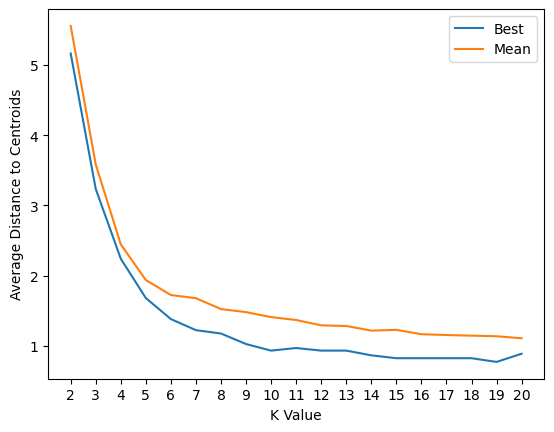

In [3]:
# created with help from ChatGPT

# create line graph of the best and mean distances for each k-value
xAxis = np.arange(2, 21)
plt.plot(xAxis, best, label='Best')
plt.plot(xAxis, mean, label='Mean')

# label axes
plt.xlabel('K Value')
plt.ylabel('Average Distance to Centroids')

# add legend to differentiate lines
plt.legend()

# make sure k values are distinguishable on graph
plt.xticks(xAxis)

# show graph
plt.show()

### Based on the graph above, a k value of 5 seems to be around the 'elbow' mentioned in class. Thus, I chose a value of 5 to run for the scatterplot below

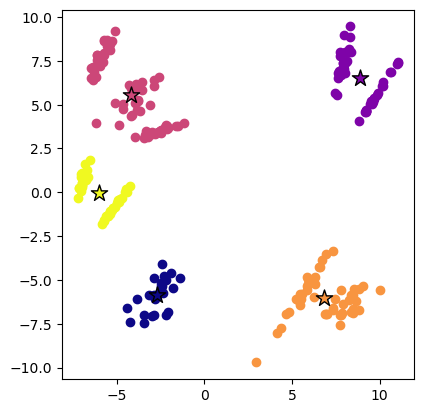

In [4]:
# choose k value of 5
k = 5

# run k-means with value of 5 and save results
result = kMeans(dataPoints, k)

# save parts of result to individual variables
assignments = result[1]
centroids = result[0]

# plot the clustering (done with help from ChatGPT)

# choose color map from pyplot
cmap = plt.get_cmap('plasma', k)

# create subplot in order to ensure equal aspects for axes
p = plt.subplots()[1]

# loop over every cluster
for i in range(k):

    # use same color for both datapoints and centroids
    color = cmap(i)

    # for each cluster, only plot datapoints that belong to that cluster
    mask = assignments == i
    p.scatter(dataPoints[mask, 0], dataPoints[mask, 1], color=color, label=f'Cluster {i}')

    # also plot that cluster's centroid
    p.scatter(centroids[i, 0], centroids[i, 1], color=color, marker='*', s=150, edgecolor='black')

# ensure scatterplot axes are exactly square (distances are correct)
p.set_aspect('equal')

# show scatterplot
plt.show()